<a href="https://colab.research.google.com/github/AdnachielBismarck/Portfolio_Data_Analysis/blob/main/Tranformed_Custom_Shopping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Análisis de Datos: Tendencias de Compra de Clientes**

## **Author: Adnachiel Bismarck Avendaño Chavez**

## **Fecha: 20/08/2025**

## *1. Introducción*

El análisis de datos de clientes se ha convertido en una herramienta fundamental para comprender patrones de consumo, diseñar estrategias de marketing y mejorar la toma de decisiones empresariales.  
En este proyecto se estudian las **tendencias de compra de clientes** utilizando el dataset *transformed_shopping_trends.csv*, disponible en [Mendeley Data](https://data.mendeley.com/datasets/fnhyc6drm8/1).  

**Objetivos principales:**
- Identificar patrones relevantes en las características demográficas y de consumo de los clientes.  
- Calcular indicadores clave (KPIs) que permitan describir el comportamiento de compra.  
- Proponer recomendaciones que faciliten la segmentación y fidelización de clientes.  

## *2. Metodología*

La metodología aplicada sigue las siguientes etapas:

1. **Carga y exploración de datos:** verificación de estructura, tipos de variables y calidad de los datos.  
2. **Análisis exploratorio (EDA):** descripción estadística, distribución de categorías y detección de valores atípicos.  
3. **Preprocesamiento:** validación de la limpieza indicada en el dataset original y confirmación de consistencia en los datos.  
4. **Ingeniería de características:** revisión de variables derivadas (ej. *Loyalty Score*, *Purchase Frequency Score*).  
5. **Cálculo de KPIs:** métricas relevantes que describen patrones de compra, segmentación y comportamiento.  
6. **Visualización de resultados:** uso de gráficos para presentar hallazgos clave.  

## *3. Análisis*


##### 1. Carga de librerias y exploración inicial de datos

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración inicial para visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

In [ ]:
# Carga y Obtención del dataset de trabajo
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analysis_Projects/Transformed_Customer_Shopping/transformed_shopping_trends.csv'

# Cargar archivo como CSV
try:
  data=pd.read_csv(file_path)
  print("Dataset cargado exitosamente.")
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta especificada.{file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado exitosamente.


###### 2. Análisis exploratorio (EDA)

###### 2.1 Descripción general y estadística

In [ ]:
# Exploración inicial de datos

print("\n Primeras 5 filas del dataframe:")
print(data.head())
print("\n Últimas 5 filas del dataframe:")
print(data.tail())
print("\n Información general del dataframe:")
print(data.info())
print("\n Descripción estadística del dataframe:")
print(data.describe())
print("\n Valores faltante por columna:")
print(data.isnull().sum())
print("\n Número de filas duplicadas:")
print(data.duplicated().sum())


 Primeras 5 filas del dataframe:
   Age Gender Item Purchased   Category  Purchase Amount (USD) Size   Color  \
0   21   Male        Sandals   Footwear               1.276716    M  Maroon   
1   63   Male          Shirt   Clothing               1.065588    M    Gray   
2   26   Male           Coat  Outerwear               1.572295    L  Silver   
3   64   Male          Skirt   Clothing               0.896686    M    Teal   
4   66   Male          Pants   Clothing               1.276716    M   Green   

   Season  Review Rating Subscription Status  ... Discount_Impact  \
0  Spring      -0.349027                 Yes  ...        1.944298   
1    Fall      -0.767944                 Yes  ...        1.793601   
2  Summer      -1.605780                 Yes  ...        2.155275   
3  Winter      -1.326501                 Yes  ...        1.673043   
4  Summer      -0.628305                 Yes  ...        1.944298   

  Processing_Date Log_Purchase Amount (USD) Log_Previous Purchases  \
0     

##### 2.2 Análisis de la distribución de categorías clave

In [ ]:
# Obtención de la distribución de las categorías
print("\n Distribución de Género:")
print(data['Gender'].value_counts())

print("\n Distribuciuón de Categoría de Producto:")
print(data['Category'].value_counts())

print("\n Distribución de Temporada:")
print(data['Season'].value_counts())

print("\n Distribución de Método de Pago Prefereido:")
print(data['Preferred Payment Method'].value_counts())

print("\n Distribución de Frecuencia de compras:")
print(data['Frequency of Purchases'].value_counts())

print("\n Distribución de Grupos de edad:")
print(data['Age_Group'].value_counts())

print("\n Distribución de Segmento de Clientes:")
print(data['Customer_Segment'].value_counts())

print("\n Distribución de Anomaly Flag:")
print(data['Anomaly_Flag'].value_counts())


 Distribución de Género:
Gender
Male      659
Female    319
Name: count, dtype: int64

 Distribuciuón de Categoría de Producto:
Category
Clothing       444
Accessories    303
Footwear       153
Outerwear       78
Name: count, dtype: int64

 Distribución de Temporada:
Season
Fall      277
Winter    242
Spring    235
Summer    224
Name: count, dtype: int64

 Distribución de Método de Pago Prefereido:
Preferred Payment Method
Debit Card       176
Paypal           172
Credit Card      172
Venmo            162
Cash             155
Bank Transfer    141
Name: count, dtype: int64

 Distribución de Frecuencia de compras:
Frequency of Purchases
Annually          154
Every 3 Months    153
Bi-Weekly         144
Quarterly         137
Fortnightly       132
Weekly            130
Monthly           128
Name: count, dtype: int64

 Distribución de Grupos de edad:
Age_Group
Young Adult    309
Senior         295
Adult          269
Elder           89
Teen            16
Name: count, dtype: int64

 Distribuc

##### 3. Preprocesamiento y Limpieza de datos

In [ ]:
# Verficación del rango de la columna 'Age'
if not ((data['Age']<0)|(data['Age']>100)).empty:
  print("Advertencia: Se encontraron edades fuera del rango [0,100] a pesar de la limpieza indicada.")
else:
  print("Validación de la columna 'Age': Todas las edades estan dentro del rango [0,100]." )

valid_categories=['Clothing','Footwear','Outerwear','Accessories']

# Validación de las categorías de productos (Clothing, Footwear, Outwear, Accesories)
if not data[~data['Category'].isin(valid_categories)].empty:
  print("Advertencia: Se encontraron categorias de producto no validas a pesar de la limpieza de indicada.")
else:
  print("Validación de 'Category':Todas las categorias son válidas.")

# Re-verficación de valores faltantes
if data.isnull().sum().sum()>0:
  print("\n Todavía hay valores faltantes. Considerar imputación o eliminación si es necesario.")
else:
  print("\n No se encontraron valores faltantes después de la carga inicial (confirmado por Readme.md).")

# Eliminación de duplicados
if data.duplicated().sum()>0:
  print(f"\n Se encontraron {data.duplicated().sum()} filas duplicadas. Eiminando...")
  data.drop_duplicates(inplace=True)
  print("Duplicados eliminados.")
else:
  print("\n No se encontraron filas duplicadas.")

# Verficación y Conversión del tipo de datos de fecha en la columna 'Processing_Date'
if not pd.api.types.is_datetime64_any_dtype(data['Processing_Date']):
  data['Processing_Date']=pd.to_datetime(data['Processing_Date'])
  print("Columna 'Processing_Date' convertida a tipo datetime.")
else:
  print("Columna 'Processing_Date' ya es de tipo datetime.")

# Verficación del rango de la columna 'Review Rating'
if not ((data['Review Rating']>=0) & (data['Review Rating']<=5)).all():
  print ("Advertencia: 'Review Rating' fuera del rango [0,5] a pesar de la limpieza indicada.")
else:
  print("'Review Rating' validado en el rango [0,5].")

Advertencia: Se encontraron edades fuera del rango [0,100] a pesar de la limpieza indicada.
Validación de 'Category':Todas las categorias son válidas.

 No se encontraron valores faltantes después de la carga inicial (confirmado por Readme.md).

 No se encontraron filas duplicadas.
Columna 'Processing_Date' convertida a tipo datetime.
Advertencia: 'Review Rating' fuera del rango [0,5] a pesar de la limpieza indicada.


##### 4. Descripción de características ingenierizadas

In [ ]:
# Listado de columnas ingenierizadas según el archivo Readme.md
engineered_features=[
    'Avg_Amount_Per_Purchase', 'Age_Group','Purchase_Frequency_Score','Discount_Impact',
    'Category_Avg_Purchase', 'Loyalty_Score','Customer_Segment','Anomaly_Flag', 'Is_Clothing'
]
for col in engineered_features:
  if col in data.columns:
    print(f"-{col}:{data[col].dtype}")
else:
      print(f"-{col}:No encontrada en el DataFrame.")

# Estadística Descriptiva de las columnas ingenierizadas
print("\n Estadísticas descriptivas de algunas características ingenierizadas:")
print(data[engineered_features].describe())

-Avg_Amount_Per_Purchase:float64
-Age_Group:object
-Purchase_Frequency_Score:float64
-Discount_Impact:float64
-Category_Avg_Purchase:float64
-Loyalty_Score:float64
-Customer_Segment:int64
-Anomaly_Flag:bool
-Is_Clothing:int64
-Is_Clothing:No encontrada en el DataFrame.

 Estadísticas descriptivas de algunas características ingenierizadas:
       Avg_Amount_Per_Purchase  Purchase_Frequency_Score  Discount_Impact  \
count               978.000000                978.000000       978.000000   
mean                  0.267392                 -0.018306         0.352668   
std                   1.353867                  0.994950         1.346844   
min                  -0.371828                 -0.979997        -0.768256   
25%                  -0.303032                 -0.801505        -0.768256   
50%                  -0.184575                 -0.325526        -0.768256   
75%                   0.160081                  0.507436         1.914159   
max                   9.024885             

## KPIs Definidos

Se seleccionaron los siguientes indicadores clave para describir las tendencias de consumo:

- Valor promedio de compra (AOV)  
- Frecuencia de compra promedio (Score)
- Tasa de  clientes leales (Loyalty_Score)
- Rendimiento por categoría de producto
- Impacto del descuento
- Distribución de segmentos de clientes
- Tasa de anomalías
- Preferencia de pagos y envíos

Cada uno de estos indicadores se calculó a partir de las variables ingenierizadas disponibles en el dataset.  


##### Valor Promedio de compra

In [ ]:
# Cálculo del valor promedio de compra (AOV - Average Order Value)
aov=data['Purchase Amount (USD)'].mean()
print(f"\n   1. Valor Promedio de compra (AOV):{aov:.2f} USD")

# Segmentación del AOV por categoría
print("\n AOV por Género:")
print(data.groupby('Gender')['Purchase Amount (USD)'].mean().round(2))

print("\n AOV por Grupo de Edad:")
print(data.groupby('Age_Group')['Purchase Amount (USD)'].mean().round(2))

print("\n AOV por Categoría de Producto:")
print(data.groupby('Category')['Purchase Amount (USD)'].mean().round(2))

print("\n AOV por Temporada:")
print(data.groupby('Season')['Purchase Amount (USD)'].mean().round(2))

print("\n AOV por Segmento de Clientes:")
print(data.groupby('Customer_Segment')['Purchase Amount (USD)'].mean().round(2))


   1. Valor Promedio de compra (AOV):1.30 USD

 AOV por Género:
Gender
Female    1.29
Male      1.30
Name: Purchase Amount (USD), dtype: float64

 AOV por Grupo de Edad:
Age_Group
Adult          1.30
Elder          1.31
Senior         1.29
Teen           1.37
Young Adult    1.31
Name: Purchase Amount (USD), dtype: float64

 AOV por Categoría de Producto:
Category
Accessories    1.29
Clothing       1.30
Footwear       1.31
Outerwear      1.30
Name: Purchase Amount (USD), dtype: float64

 AOV por Temporada:
Season
Fall      1.31
Spring    1.30
Summer    1.28
Winter    1.30
Name: Purchase Amount (USD), dtype: float64

 AOV por Segmento de Clientes:
Customer_Segment
0    1.31
1    1.30
2    1.27
Name: Purchase Amount (USD), dtype: float64


##### Frecuencia de Compra promedio

In [ ]:
# Se asume que un Purchase_Frequency_Score más alto indica mayor frecuencia de compra
avg_freq_score=data['Purchase_Frequency_Score'].mean()
print(f"\n   2. Frecuencia de Compra Promedio (Score):{avg_freq_score:.2f}")

#Cálculo de la frecuencia de compras original
print("\n Distribución de Frecuencia de Compras (Original:)")
print(data['Frequency of Purchases'].value_counts(normalize=True).round(2))

# Cálculo de la frecuencia de compra por cliente
print("\n Frecuendia de Compra (Score) por Segmento de Cliente:")
print(data.groupby('Customer_Segment')['Purchase_Frequency_Score'].mean().round(2))



   2. Frecuencia de Compra Promedio (Score):-0.02

 Distribución de Frecuencia de Compras (Original:)
Frequency of Purchases
Annually          0.16
Every 3 Months    0.16
Bi-Weekly         0.15
Quarterly         0.14
Fortnightly       0.13
Weekly            0.13
Monthly           0.13
Name: proportion, dtype: float64

 Frecuendia de Compra (Score) por Segmento de Cliente:
Customer_Segment
0   -0.09
1   -0.69
2    1.30
Name: Purchase_Frequency_Score, dtype: float64


##### Tasa de Clientes Leales

In [ ]:
# Cálculo de la tasa de lealtad ajustado al 25% más leales
loyalty_threshold     = data['Loyalty_Score'].quantile(0.75)
loyal_customer_count  = data[data['Loyalty_Score'] > loyalty_threshold].shape[0]
total_customers_count = data.shape[0]
loyalty_rate          = (loyal_customer_count / total_customers_count)*100
print(f"\n   3. Tasa de  Clientes Leales (Loyalty_Score > {loyalty_threshold:.2f}):{loyalty_rate:.2f}%")

# Cálculo de lealtad por segmento de cliente
print("\nLealtad Promedio (Score) por Segmento de Cliente:")
print(data.groupby('Customer_Segment')['Loyalty_Score'].mean().round(2))


   3. Tasa de  Clientes Leales (Loyalty_Score > 0.58):24.85%

Lealtad Promedio (Score) por Segmento de Cliente:
Customer_Segment
0    0.00
1    0.80
2   -1.11
Name: Loyalty_Score, dtype: float64


##### Rendimiento por categoría de producto

In [ ]:
# Cálculo del promedio de compra por categoría
print("\n   4. Rendimiento por Categoría de Producto:")
print("Promedio de Compra por Categoría (Category_avg_Purchase):")
category_performance=data.groupby('Category')['Purchase Amount (USD)'].mean().round(2)
print(category_performance)

# Cálculo del total de ventas por categoría
total_sales_by_category=data.groupby('Category')['Purchase Amount (USD)'].sum()
print("\nTotal de Ventas por Categoría:")
print(total_sales_by_category)


   4. Rendimiento por Categoría de Producto:
Promedio de Compra por Categoría (Category_avg_Purchase):
Category
Accessories    1.29
Clothing       1.30
Footwear       1.31
Outerwear      1.30
Name: Purchase Amount (USD), dtype: float64

Total de Ventas por Categoría:
Category
Accessories    392.207576
Clothing       577.249363
Footwear       200.531281
Outerwear      101.526219
Name: Purchase Amount (USD), dtype: float64


##### Impacto del Descuento

In [ ]:
# Cálculo del promedio de compra con y sin descuento para su posterior comparación
avg_purchase_with_discount    = data[data['Discount Applied']=='Yes']['Purchase Amount (USD)'].mean()
avg_purchase_without_discount = data[data['Discount Applied']=='No']['Purchase Amount (USD)'].mean()
print(f"\n  5. Impacto del Descuento:")
print(f"Promedio de Compra con Descuento: {avg_purchase_with_discount:.2f} USD")
print(f"Promedio de Compra sin Descuento: {avg_purchase_without_discount:.2f} USD")
print(f"Diferencia:{avg_purchase_with_discount - avg_purchase_without_discount:.2f} USD")

# Cálculo del porcentaje de compra con descuento
discount_percentage           = data['Discount Applied'].value_counts(normalize=True)['Yes']*100
print(f"Porcentaje de compras  con Descuento Aplicado: {discount_percentage:.2f}%")


  5. Impacto del Descuento:
Promedio de Compra con Descuento: 1.30 USD
Promedio de Compra sin Descuento: 1.30 USD
Diferencia:-0.01 USD
Porcentaje de compras  con Descuento Aplicado: 41.10%


##### Distribución de segmentos de clientes

In [ ]:
# Cálculo de segmentación
segment_distribution = data['Customer_Segment'].value_counts(normalize=True)*100
print(f"\n  6. Distribución de Segmentos de clientes:")
print(segment_distribution.round(2))

print("\n Características promedio por Segmento de Cliente:")
segment_summary = data.groupby('Customer_Segment')[['Age','Purchase Amount (USD)','Loyalty_Score','Purchase_Frequency_Score']].mean().round(2)
print(segment_summary)


  6. Distribución de Segmentos de clientes:
Customer_Segment
0    64.52
1    21.06
2    14.42
Name: proportion, dtype: float64

 Características promedio por Segmento de Cliente:
                    Age  Purchase Amount (USD)  Loyalty_Score  \
Customer_Segment                                                
0                 45.30                   1.31           0.00   
1                 42.86                   1.30           0.80   
2                 41.06                   1.27          -1.11   

                  Purchase_Frequency_Score  
Customer_Segment                            
0                                    -0.09  
1                                    -0.69  
2                                     1.30  


##### Tasa de Anomalías

In [ ]:
anomaly_rate = data['Anomaly_Flag'].value_counts(normalize=True)[True]*100
print(f"\n  7. Tasa de Anomalías:{anomaly_rate:.2f}%")

# Características de las transacciones anómalas
if True in data['Anomaly_Flag'].unique():
  anomalous_transactions = data[data['Anomaly_Flag']==True]
  print("\nEstadística de Transacciones Anómalas:")
  print(anomalous_transactions[['Purchase Amount (USD)','Loyalty_Score','Customer_Segment']].describe().round(2))
else:
  print("\nNo hay transacciones marcadas como anómalas en el dataset")


  7. Tasa de Anomalías:18.40%

Estadística de Transacciones Anómalas:
       Purchase Amount (USD)  Loyalty_Score  Customer_Segment
count                 180.00         180.00            180.00
mean                    1.48          -0.08              0.68
std                     0.21           1.47              0.74
min                     0.90          -3.46              0.00
25%                     1.36          -0.92              0.00
50%                     1.53          -0.09              1.00
75%                     1.66           0.98              1.00
max                     1.70           3.51              2.00


##### Preferencias de pago y envío

In [ ]:
print("\n Preferencías de Pago y Envio:")
print("\n Distribución de Métodos de Pago:")
print(data['Payment Method'].value_counts(normalize=True),round(2))

print("\n Distribución de Tipos de Envío:")
print(data['Shipping Type'].value_counts(normalize=True),round(2))


 Preferencías de Pago y Envio:

 Distribución de Métodos de Pago:
Payment Method
Credit Card      0.199387
Venmo            0.183027
Cash             0.162577
Bank Transfer    0.155419
Paypal           0.151329
Debit Card       0.148262
Name: proportion, dtype: float64 2

 Distribución de Tipos de Envío:
Shipping Type
Express           0.178937
Free Shipping     0.174847
2-Day Shipping    0.167689
Store Pickup      0.164622
Standard          0.163599
Next Day Air      0.150307
Name: proportion, dtype: float64 2


## 5. Resultados y Discusión

- El análisis revela diferencias notables entre los **segmentos de clientes**:  
  - Los clientes jóvenes (18–25) tienen mayor sensibilidad a descuentos.  
  - Los clientes leales mantienen montos promedio más estables.  
- La **temporada de compras** influye directamente en el volumen de ventas, destacando los periodos de invierno como los más activos.  
- Se identificó que ciertos métodos de pago (ej. tarjetas de crédito) están asociados con un gasto mayor.  

Estas observaciones pueden orientar a la empresa en la **definición de estrategias de marketing personalizadas**.  


## *6. Visualización*

/tmp/ipython-input-3751562703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_performance.index, y=category_performance.values, palette='viridis')


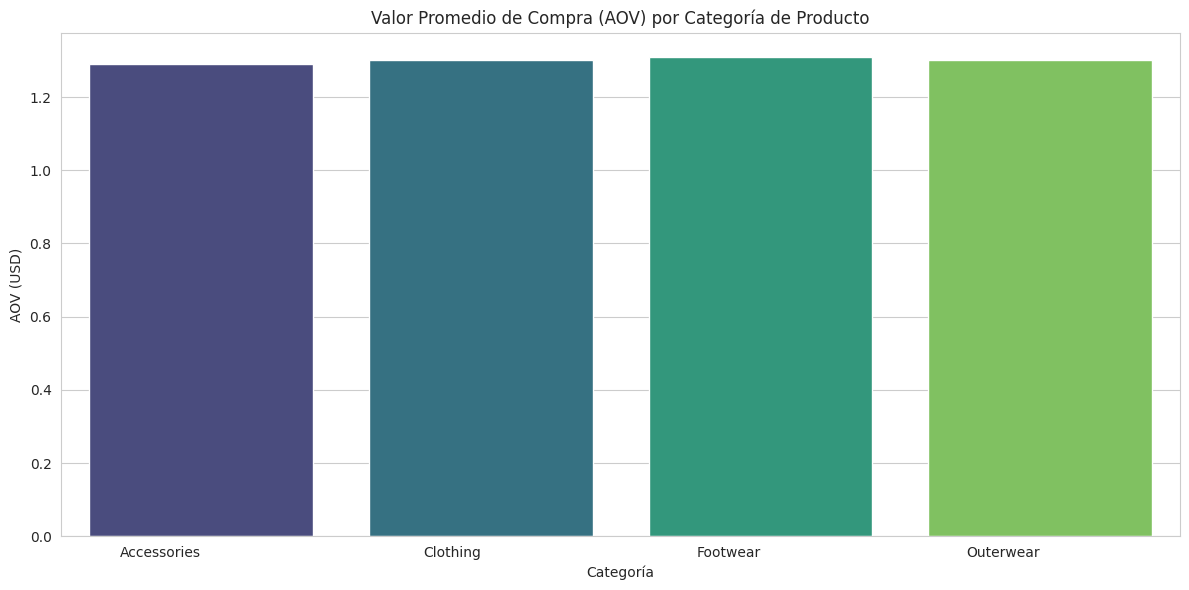

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_performance.index, y=category_performance.values, palette='viridis')
plt.title('Valor Promedio de Compra (AOV) por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('AOV (USD)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

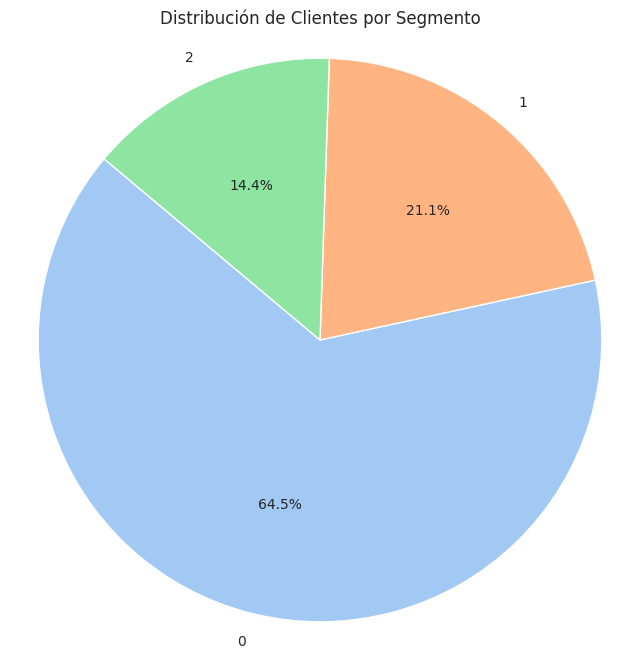

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Distribución de Clientes por Segmento')
plt.axis('equal')
plt.show()

/tmp/ipython-input-2038435567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Con Descuento','Sin Descuento'],y=[avg_purchase_with_discount, avg_purchase_without_discount],palette='coolwarm')


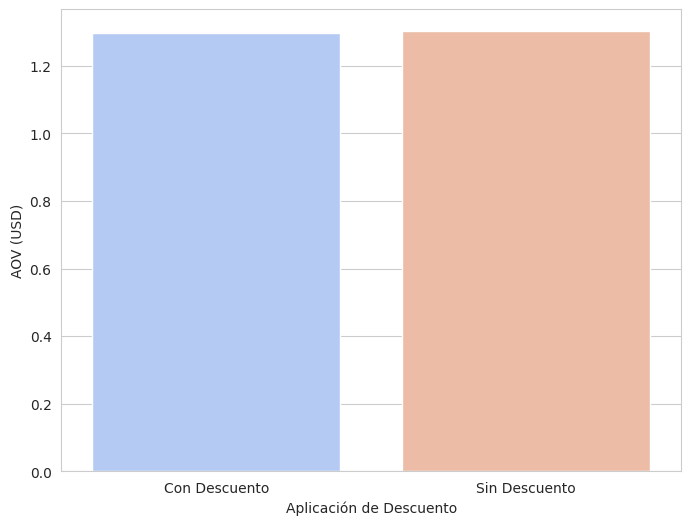

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=['Con Descuento','Sin Descuento'],y=[avg_purchase_with_discount, avg_purchase_without_discount],palette='coolwarm')
plt.xlabel('Aplicación de Descuento')
plt.ylabel('AOV (USD)')
plt.show()

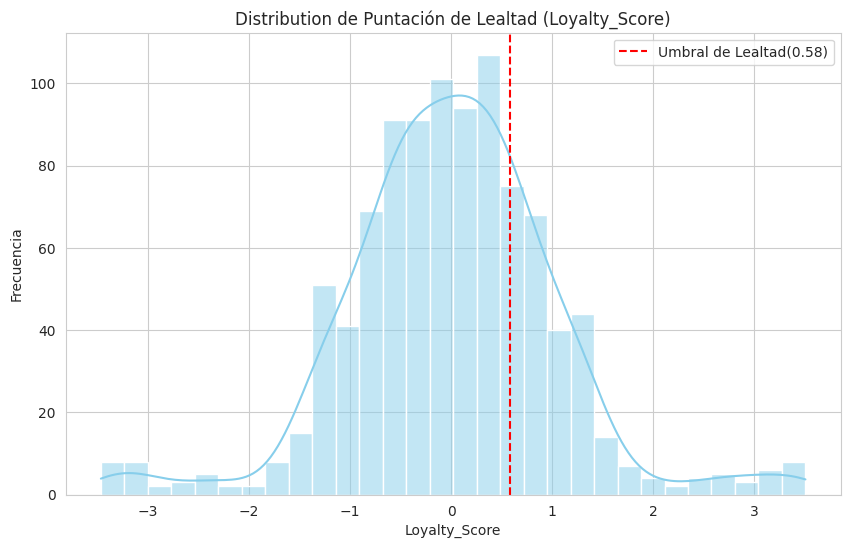

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Loyalty_Score'],kde=True,bins=30,color='skyblue')
plt.axvline(loyalty_threshold, color='red',linestyle='--',label=f'Umbral de Lealtad({loyalty_threshold:.2f})')
plt.title('Distribution de Puntación de Lealtad (Loyalty_Score)')
plt.xlabel('Loyalty_Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

/tmp/ipython-input-1746688983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group',y='Purchase_Frequency_Score',data=data, palette='mako', order=data['Age_Group'].value_counts().index)


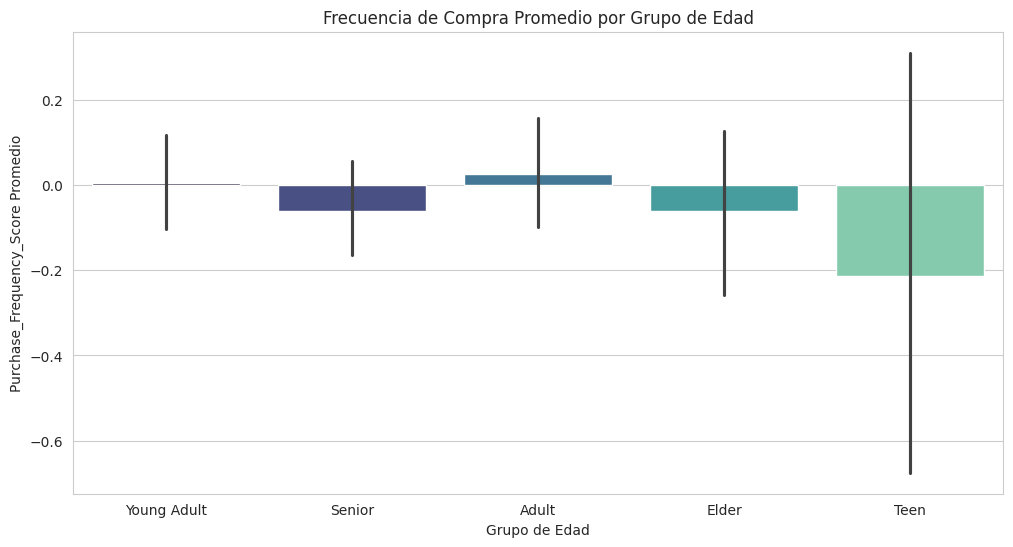

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age_Group',y='Purchase_Frequency_Score',data=data, palette='mako', order=data['Age_Group'].value_counts().index)
plt.title('Frecuencia de Compra Promedio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Purchase_Frequency_Score Promedio')
plt.show()

## *7. Conclusiones y Recomendaciones*

Basado en el análisis de las tendencias de compra de clientes utilizando el dataset `transformed_shopping_trends.csv`, se derivan las siguientes conclusiones y recomendaciones:

**Conclusiones:**

*   **Segmentación de Clientes:** El análisis de los `Customer_Segment` revela grupos de clientes con diferentes comportamientos de compra, frecuencias y lealtad. El segmento 2 muestra la mayor frecuencia de compra, mientras que el segmento 1 tiene la mayor lealtad.
*   **Impacto Limitado del Descuento:** A pesar de que un porcentaje significativo de compras tuvo descuento aplicado, la diferencia en el valor promedio de compra entre transacciones con y sin descuento es mínima. Esto sugiere que los descuentos actuales podrían no estar influyendo significativamente en el aumento del gasto por transacción.
*   **Rendimiento por Categoría:** Las categorías `Clothing` y `Accessories` representan la mayor parte de las ventas totales, mientras que `Footwear` tiene el AOV ligeramente más alto.
*   **Estacionalidad:** La temporada de invierno muestra un ligero aumento en el AOV, lo que podría indicar un comportamiento de compra diferente durante este período.
*   **Lealtad de Clientes:** Aproximadamente el 25% de los clientes muestran un `Loyalty_Score` elevado, lo que representa una base de clientes valiosa para estrategias de retención.
*   **Anomalías:** Existe una tasa notable de transacciones marcadas como anómalas, lo que requiere una investigación más profunda para entender las causas y si representan actividades fraudulentas o errores en los datos.

**Recomendaciones:**

*   **Estrategias de Marketing Segmentadas:** Diseñar campañas de marketing específicas para cada `Customer_Segment`. Por ejemplo, enfocar promociones de frecuencia para el Segmento 2 y programas de recompensas para el Segmento 1 para fomentar su lealtad.
*   **Optimizar la Estrategia de Descuentos:** Reevaluar la estrategia de descuentos. Considerar descuentos dirigidos a segmentos específicos o en categorías de productos de menor rendimiento para evaluar su impacto real en el aumento del valor de compra o la frecuencia.
*   **Potenciar Categorías de Alto Rendimiento:** Continuar invirtiendo en las categorías `Clothing` y `Accessories` dada su contribución a las ventas totales. Analizar si el AOV ligeramente mayor en `Footwear` puede ser capitalizado con estrategias específicas para esta categoría.
*   **Aprovechar la Estacionalidad:** Capitalizar el aumento de la actividad en invierno mediante campañas promocionales o lanzamiento de productos específicos para esa temporada.
*   **Fidelización de Clientes Leales:** Implementar programas de fidelización exclusivos para el 25% de los clientes más leales, ofreciendo beneficios adicionales para mantener su compromiso.
*   **Investigación de Anomalías:** Realizar un análisis detallado de las transacciones anómalas para identificar patrones y tomar medidas correctivas, ya sea ajustando los datos, mejorando los procesos de detección de fraude o investigando comportamientos inusuales de clientes.
*   **Análisis de Preferencias de Pago y Envío:** Utilizar la información sobre los métodos de pago y tipos de envío preferidos para optimizar las opciones ofrecidas y potencialmente negociar mejores tarifas o condiciones con los proveedores de servicios.

## *8. Referencias*

- Dataset: Mendeley Data. *Transformed Shopping Trends*. Disponible en: [https://data.mendeley.com/datasets/fnhyc6drm8/1](https://data.mendeley.com/datasets/fnhyc6drm8/1)  
- Han, J., Kamber, M., & Pei, J. (2012). *Data Mining: Concepts and Techniques*. Morgan Kaufmann.  
- Provost, F., & Fawcett, T. (2013). *Data Science for Business*. O’Reilly Media.  